# Исследование объявлений о продаже квартир

 В ходе иследования будут проанализированы данные, предоставленные сервисом Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задачей исследования будет являться установление параментров, оказывающих наибольшее влияние на рыночную стоимость объектов недвижимости, которые могут позволить построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 
 Согласно пояснениям к представленным данным, по каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. Данные содержат информацию: 
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении
 Среди объявлений присутствуют различные объекты недвижимости, в том числе апартаменты — нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.
 В целях достижения цели исследования будут реализованы следующие этапы:
 1. Считывание предоставленных данных в DataFrame Pandas, изучение общей информации о данных.
 2. Предобработка данных, заполнение отсутствующих значений, изменение типов данных.
 3. Получение новых данных по исходным, в том числе цены квадратного метра, деня недели, месяца и года публикации объявления, категории этажа квартиры: первый, последний, другой, соотношения жилой и общей площади, а также отношение площади кухни к общей.
 4. Проведение исследовательского анализа данных: площадь, цена, число комнат, высота потолков, в том числе с использование гистограмм. Изучение времени экспозиции объявлений. Изучение факторов, которые больше всего влияют на стоимость квартиры. Анализ территориального распределения объявлений с выделением населённых пунктов с наибольшим и наименьшим количеством объявлений. Детальный анализ объявлений по городу Санкт-Петербург с выделением центральной зоны города.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
real_estate_base = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate_base.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
real_estate_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод
База состоит из 23 699 строк и 22 столбцов, занимает более 3.7 Мбайт памяти. Названия столбцов не требуют изменений. 13 столбцов содержат пустые значения, в том числе те, которые получены автоматически на основе картографических данных. Возможно это связано с тем, что по данным, введенным пользователем, не удалось установить географические координаты. По результатам просмотра уникальных значений столбцов, которые содержат качественные характеристики, установлено, что анализу данных должна предшествовать предобработка данных, в ходе которой нужно будет обработать пропуски значений, произвести замену типов данных, обработать дубликаты, категоризировать данные.
В целях заполнения пропущенных данных будут использоваться медианные значения сопоставимых данных.

### Шаг 2. Предобработка данных

In [4]:
# Заполняем отсутствующие значения по столбцу 'floors_total' значениями 'floor'
def past_floors(data):
    try:
        floor = data['floor']
        if data['floors_total'] != data['floors_total']:
            total_floors = floor
        else:
            total_floors = data['floors_total']
        return total_floors
    except:
        total_floors = 9 # Медиана, рассчитанная по столбцу 'floors_total'
        return total_floors

real_estate_base['floors_total'] = real_estate_base.apply(past_floors, axis=1)

In [5]:
#real_estate_base['ceiling_height'].describe() По полученным значениям рассчитали границы диапазона ящика с усами
#Сформируем словарь с медианными значениями высоты потолков в зависимости от количества комнат
ceiling_height_median = real_estate_base.query('2.1 <= ceiling_height <= 3.22').pivot_table(index='rooms', values='ceiling_height', aggfunc=['median'])
ceiling_height_median.columns = ['median']
ceiling_height_median_dict = ceiling_height_median.to_dict()


In [6]:

# Заполним пропушенные значения в столбце с высотой потолков используя полученные данные
def past_ceiling(data):
    try:
        ceiling_height = data['ceiling_height']
        if data['ceiling_height'] != data['ceiling_height']:
            rooms = data['rooms']
            if data['ceiling_height'] != data['ceiling_height']:
                ceiling_height = ceiling_height_median_dict['median'][rooms]
            else:
                ceiling_height = data['ceiling_height']
        return ceiling_height
    except:
        if data['ceiling_height'] != data['ceiling_height']:
            ceiling_height = 3.0 # Медиана, рассчитанная по столбцу 'ceiling_height'
        return ceiling_height
        
real_estate_base['ceiling_height'] = real_estate_base.apply(past_ceiling, axis=1)

In [11]:
real_estate_base['ceiling_height'].describe()


count    23699.000000
mean         2.715145
std          0.989595
min          1.000000
25%          2.600000
50%          2.610000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [7]:
studio_base = real_estate_base.query('studio == 1'
                  ).pivot_table(index='rooms', values=['total_area','living_area','kitchen_area'])
studio_base['liv_share'] = studio_base['living_area'] / studio_base['total_area']
studio_living_share_median = 0.69 # Медиана доли жилой площади в студиях 0,69
studio_kitchen_share_median = 0.25 # Учитывая отсутствие данных о площади кухни в студиях, установим для них медианное значение 
                                     #для однокомнатных квартир

In [8]:
is_apartment_base = real_estate_base.query('is_apartment == 1'
                     ).pivot_table(index='rooms', values=['total_area','living_area','kitchen_area'])
is_apartment_base['liv_share'] = is_apartment_base['living_area'] / is_apartment_base['total_area']
is_apartment_base['kitchen_share'] = is_apartment_base['kitchen_area'] / is_apartment_base['total_area']
#Медиана доли жилой площади в апартаментах меняется от 0,50 до 0,74, сформируем словарь для замены
is_apartment_living_median_dict = is_apartment_base['liv_share'].to_dict()
is_apartment_kitchen_median_dict = is_apartment_base['kitchen_share'].to_dict() # от 0,09 до 0,249

In [9]:
apartment_base = real_estate_base.query('is_apartment != 1 and studio != 1'
                     ).pivot_table(index='rooms', values=['total_area','living_area','kitchen_area'])
apartment_base['liv_share'] = apartment_base['living_area'] / apartment_base['total_area']
apartment_base['kitchen_share'] = apartment_base['kitchen_area'] / apartment_base['total_area']
#Медиана доли жилой площади в апартаментах меняется от 0,45 до 0,71, сформируем словарь для замены
apartment_living_median_dict = apartment_base['liv_share'].to_dict()
apartment_kitchen_median_dict = apartment_base['kitchen_share'].to_dict() # от 0,048 до 0,254

In [10]:
# Функция для замены отсутствующих значений в толбце с Жилой площадью ('living_area')
def past_living_area(data):
    try:
        living_area = data['living_area']
        if data['living_area'] != data['living_area']:
            total_area = data['total_area']
            rooms = data['rooms']
            if data['is_apartment'] != 1 and data['studio'] != 1:
                living_area = total_area * apartment_living_median_dict[rooms]
            if data['is_apartment'] == 1:
                living_area = total_area * is_apartment_living_median_dict[rooms]
            if data['studio'] == 1:
                living_area = total_area * studio_living_share_median
            if living_area != living_area:
                living_area = total_area * 0.63 # Медиана по всем объявлениям
        return living_area
    except:
        if data['living_area'] != data['living_area']:
            total_area = data['total_area']
            living_area = total_area * 0.63 # Медиана по всем объявлениям
        return living_area
    
real_estate_base['living_area'] = real_estate_base.apply(past_living_area, axis=1)       

In [11]:
# Функция для замены отсутствующих значений в толбце с площадью кухни ('kitchen_area')
def past_kitchen_area(data):
    try:
        kitchen_area = data['kitchen_area']
        if data['kitchen_area'] != data['kitchen_area']:
            total_area = data['total_area']
            rooms = data['rooms']
            if data['is_apartment'] != 1 and data['studio'] != 1:
                kitchen_area = total_area * apartment_kitchen_median_dict[rooms]
            if data['is_apartment'] == 1:
                kitchen_area = total_area * is_apartment_kitchen_median_dict[rooms]
            if data['studio'] == 1:
                kitchen_area = total_area * studio_kitchen_median
            if kitchen_area != kitchen_area:
                kitchen_area = total_area * 0.175 # Медиана по всем объявлениям
        return kitchen_area
    except:
        if data['kitchen_area'] != data['kitchen_area']:
            total_area = data['total_area']
            kitchen_area = total_area * 0.175 # Медиана по всем объявлениям
        return kitchen_area
    
real_estate_base['kitchen_area'] = real_estate_base.apply(past_kitchen_area, axis=1)      

In [12]:
# Приведем данные к нужным типам
# Столбец с датой к формату даты
real_estate_base['first_day_exposition'] = pd.to_datetime(real_estate_base['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Изменим тип столбцов на int8, так как значения в них соответствуют указанному типу данных
data_set = real_estate_base.astype({'total_images':'int8','rooms':'int8','floor':'int8'})
# Заменим отсутствующие значения в стобце "Апартаменты" на 0 и изменим тип данных столбца на bool
real_estate_base['is_apartment'] = real_estate_base['is_apartment'].fillna(value=0)
data_set = real_estate_base.astype({'is_apartment':'bool'})
#real_estate_base.info()
real_estate_base.duplicated().sum() # Полные дупликаты отсутствуют.

0

### Вывод
Была произведена предобработка данных, заполнены отсутствующие значения в столбцах, изменены типы данных на соответствующие значениям.

Была произведена предобработка данных, заполнены отсутствующие значения в столбцах, изменены типы данных на соответствующие значениям. Пропушены значения в столбцах: floors_total, kitchen_area, living_area, ceiling_height, locality_name, связаны с неточностями при вводе объявлений. Значения в cityCenters_nearest отсутствуют, в основном, в населенных пунктах Ленинградской области. Отсутствующие значения в столбце days_exposition могут свидетельствовать о том, что недвижимость ещё не продана. В столбце "Название населенного пункта" ('locality_name') пропуски не заполнялись, так как их количество незначительно.
Отсутствующие значения в столбце с этажностью дома были заменены на значения этажа в объявлении. Отсутствующие значения в living_area, ceiling_height были заменены на медианы, рассчитанные по количеству комнат, при отсутствии - по всем объявлениям.

### Шаг 3. Посчитайте и добавьте в таблицу

In [13]:
# Сформируем рабочую базу из нужных столбцов
work_columns = ['total_area','last_price','first_day_exposition','floor', 'floors_total', 
               'kitchen_area', 'living_area', 'rooms', 'ceiling_height', 'days_exposition',
                'locality_name','cityCenters_nearest'
               ]
work_base = real_estate_base[work_columns].copy()

In [14]:
#цену квадратного метра;
work_base['price_m2'] = work_base['last_price'] / work_base['total_area']
work_base
#день недели, месяц и год публикации объявления;
work_base['weekday_ad'] = work_base['first_day_exposition'].dt.weekday
work_base['month_ad'] = work_base['first_day_exposition'].dt.month
work_base['year_ad'] = work_base['first_day_exposition'].dt.year
#этаж квартиры; варианты — первый, последний, другой;
def floor_group(data): # Функция для каждой строки датафрейма, если ошибка (в floors_total есть пустые значения, может ноль),
                       # то этаж - другой
    try:
        floor = data['floor']
        floors_total = data['floors_total']
        if floor == 1:
            group = 'первый'
        elif floor == floors_total:
            group = 'последний'
        else:
            group = 'другой'
        return group
    except:
        group = 'последний'
        return group
work_base['floor_group'] = work_base.apply(floor_group, axis=1)
#соотношение жилой и общей площади, а также отношение площади кухни к общей.
work_base['living_share'] = work_base['living_area'] / work_base['total_area']
work_base['kitchen_share'] = work_base['kitchen_area'] / work_base['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

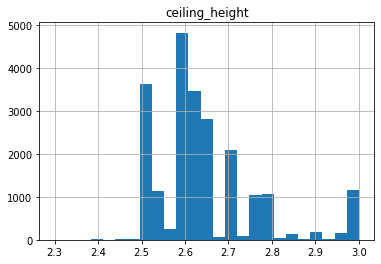

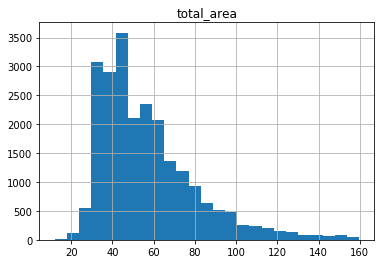

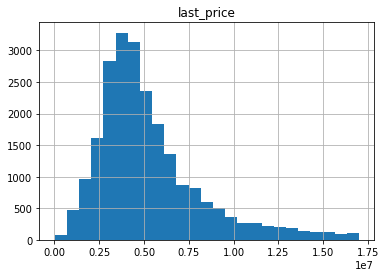

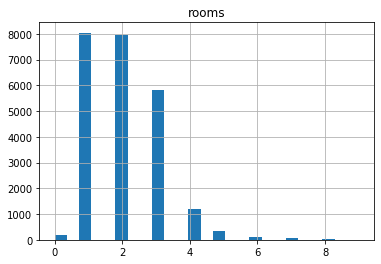

In [15]:
#Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
#Построим гистограммы для каждого параметра.
parametr_list = ['ceiling_height', 'total_area', 'last_price', 'rooms']
for parametr in parametr_list:
    min_range_value = 0
    max_range_value = 0
    data_characteristics_dict = work_base[parametr].describe().to_dict()
    IQR_for_hist = data_characteristics_dict['75%'] - data_characteristics_dict['25%']
    min_range_value = data_characteristics_dict['25%'] - 3 * IQR_for_hist
    max_range_value = data_characteristics_dict['75%'] + 3 * IQR_for_hist
    if min_range_value < data_characteristics_dict['min']:
        min_range_value = data_characteristics_dict['min']
    if max_range_value > data_characteristics_dict['max']:
        max_range_value = data_characteristics_dict['max']
    work_base.hist(parametr, bins=25, range=(min_range_value, max_range_value))

180.88863436982163
95.0


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
18.2%       30.000000
36.4%       60.000000
50%         95.000000
63.6%      153.000000
81.8%      313.000000
max       1580.000000
Name: days_exposition, dtype: float64

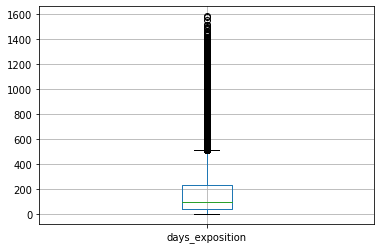

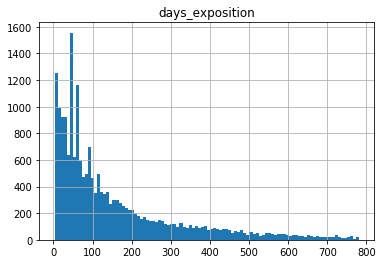

In [16]:
#Изучим время продажи квартиры. Построим гистограмму. 
#Посчитаем среднее и медиану. Определим, сколько обычно занимает продажа. 
#Определем когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
work_base.boxplot('days_exposition')
print(work_base['days_exposition'].mean()) # Среднее значение экспозиции составило 181 день
print(work_base['days_exposition'].median()) # Медианное значение экспозиции составило 95 дней
work_base.hist('days_exposition', bins=100, range=(3,781))
work_base.query('days_exposition>=3 and days_exposition<=781').count()
# Значения выбраны по аналогии с темпами в музыке: очень медленно - менее 40 ударов в минуту, медленно - 80, средне - 110,
#быстро - 140, очень быстро - более 180 ударов в минуту
work_base['days_exposition'].describe(percentiles=[0.181818,0.363636,0.5,0.636363,0.818181]) 

Среднее значение экспозиции составило 181 день, медианное - 95 дней. Согласно полученным данным, можно считать, что продажи прошли очень быстро, если срок экспозиции объявления составлял менее 30 дней, очень медленно - более 313 дней.

In [17]:
#Уберем редкие и выбивающиеся значения для цены квартиры
# Найдем редкие значения для параметров. Под редкими значениями будут пониматься 
# значения, которые не попадают в диапазон от Q1-3*IQR до Q3+3*IQR. 
work_base_norm = work_base.copy()
list_of_analyzed_parameters = ['ceiling_height', 'total_area', 'last_price', 'rooms']
work_base.columns.to_list() # Создадим список параметров
for parametr in work_base.columns.to_list(): # Рассчитаем для каждого параметра редкие значения
    try:
        min_range_value = 0
        max_range_value = 0
        data_characteristics_dict = work_base[parametr].describe().to_dict()
        IQR_for_hist = data_characteristics_dict['75%'] - data_characteristics_dict['25%']
        min_range_value = data_characteristics_dict['25%'] - 1.5 * IQR_for_hist
        max_range_value = data_characteristics_dict['75%'] + 1.5 * IQR_for_hist
        if min_range_value < data_characteristics_dict['min']:
            min_range_value = data_characteristics_dict['min']
        if max_range_value > data_characteristics_dict['max']:
            max_range_value = data_characteristics_dict['max']
        print('Редкими значениями для {} являются значения не более {:.2f} и не менее {:.2f}'.
                   format(parametr, min_range_value, max_range_value))
        
        # Формируем текст запроса для query
        text_query = parametr + ' >= @min_range_value and ' + parametr +' <= @max_range_value'
        
        print('В указанном диапазоне находится {} значений.'.format(len(work_base.query(text_query))))
        if parametr in list_of_analyzed_parameters:
            work_base_norm = work_base_norm.query(text_query) # Удаляем выбросы по анализируемым параметрам
    except:
        print('Наверное {} относится к категориальной переменной'.format(parametr))

Редкими значениями для total_area являются значения не более 12.00 и не менее 114.75
В указанном диапазоне находится 22459 значений.
Редкими значениями для last_price являются значения не более 12190.00 и не менее 11900000.00
В указанном диапазоне находится 21665 значений.
Наверное first_day_exposition относится к категориальной переменной
Редкими значениями для floor являются значения не более 1.00 и не менее 17.00
В указанном диапазоне находится 22777 значений.
Редкими значениями для floors_total являются значения не более 1.00 и не менее 32.50
В указанном диапазоне находится 23667 значений.
Редкими значениями для kitchen_area являются значения не более 1.30 и не менее 19.22
В указанном диапазоне находится 22396 значений.
Редкими значениями для living_area являются значения не более 2.00 и не менее 77.70
В указанном диапазоне находится 22822 значений.
Редкими значениями для rooms являются значения не более 0.00 и не менее 6.00
В указанном диапазоне находится 23609 значений.
Редкими з

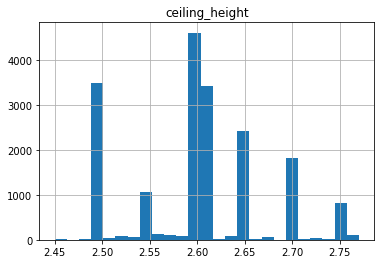

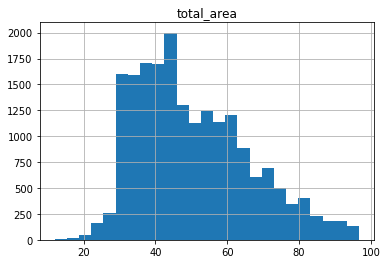

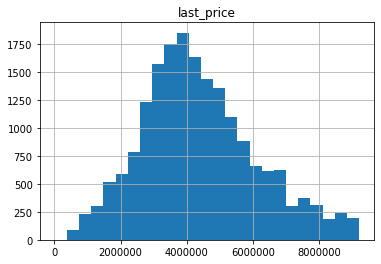

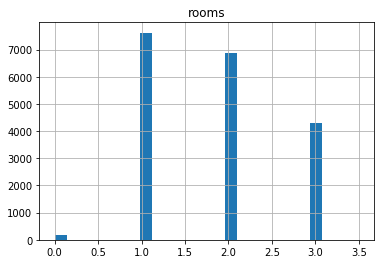

In [18]:
# Для базы с нормализованными значениями по всем параметрам построим гистограммы для ряда параметров.
parametr_list = ['ceiling_height', 'total_area', 'last_price', 'rooms']
for parametr in parametr_list:
    min_range_value = 0
    max_range_value = 0
    data_characteristics_dict = work_base_norm[parametr].describe().to_dict()
    IQR_for_hist = data_characteristics_dict['75%'] - data_characteristics_dict['25%']
    min_range_value = data_characteristics_dict['25%'] - 1.5 * IQR_for_hist
    max_range_value = data_characteristics_dict['75%'] + 1.5 * IQR_for_hist
    if min_range_value < data_characteristics_dict['min']:
        min_range_value = data_characteristics_dict['min']
    if max_range_value > data_characteristics_dict['max']:
        max_range_value = data_characteristics_dict['max']
    work_base_norm.hist(parametr, bins=25, range=(min_range_value, max_range_value))

In [19]:
work_base_norm.corr()

,total_area,last_price,floor,floors_total,kitchen_area,living_area,rooms,ceiling_height,days_exposition,cityCenters_nearest,price_m2,weekday_ad,month_ad,year_ad,living_share,kitchen_share
total_area,1.000000,0.679641,0.002518,0.029406,0.440245,0.909905,0.801331,0.190248,0.090656,-0.072622,-0.096706,-0.004013,0.011114,-0.057618,0.252998,-0.435417
last_price,0.679641,1.000000,0.193330,0.290124,0.490137,0.542744,0.413014,0.279111,0.047840,-0.306237,0.631099,-0.009032,0.008787,0.008820,0.003181,-0.109404
floor,0.002518,0.193330,1.000000,0.668298,0.238636,-0.109366,-0.162523,0.196573,-0.031292,-0.053210,0.279204,0.009366,0.019730,0.002616,-0.263933,0.261644
floors_total,0.029406,0.290124,0.668298,1.000000,0.358557,-0.131933,-0.213205,0.306825,-0.031890,-0.097370,0.392233,0.009596,0.014159,0.003185,-0.368777,0.370376
kitchen_area,0.440245,0.490137,0.238636,0.358557,1.000000,0.144601,0.041634,0.333444,0.041203,-0.092351,0.208866,-0.005062,0.022303,-0.033401,-0.471909,0.576719
living_area,0.909905,0.542744,-0.109366,-0.131933,0.144601,1.000000,0.893975,0.073716,0.077973,-0.054112,-0.186299,0.000172,0.004615,-0.046567,0.613276,-0.645505
rooms,0.801331,0.413014,-0.162523,-0.213205,0.041634,0.893975,1.000000,-0.024983,0.066622,-0.027465,-0.249826,-0.000586,-0.002347,-0.029293,0.576404,-0.663116
ceiling_height,0.190248,0.279111,0.196573,0.306825,0.333444,0.073716,-0.024983,1.000000,0.017910,-0.104319,0.194680,0.000687,0.006584,-0.065993,-0.190501,0.190492
days_exposition,0.090656,0.047840,-0.031292,-0.031890,0.041203,0.077973,0.066622,0.017910,1.000000,-0.004767,-0.029123,-0.021654,-0.035674,-0.597950,0.004516,-0.031617
cityCenters_nearest,-0.072622,-0.306237,-0.053210,-0.097370,-0.092351,-0.054112,-0.027465,-0.104319,-0.004767,1.000000,-0.402271,0.000793,-0.014394,0.017341,0.009892,-0.036958


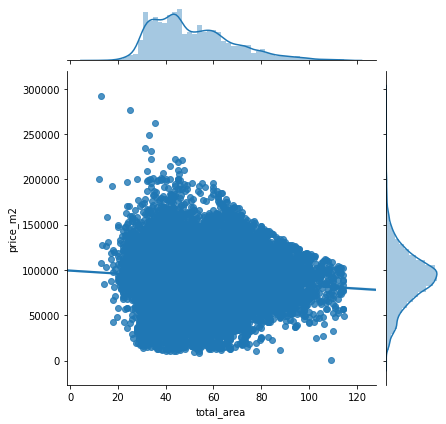

In [20]:
sns.jointplot(x='total_area', y='price_m2', data=work_base_norm, kind='reg')

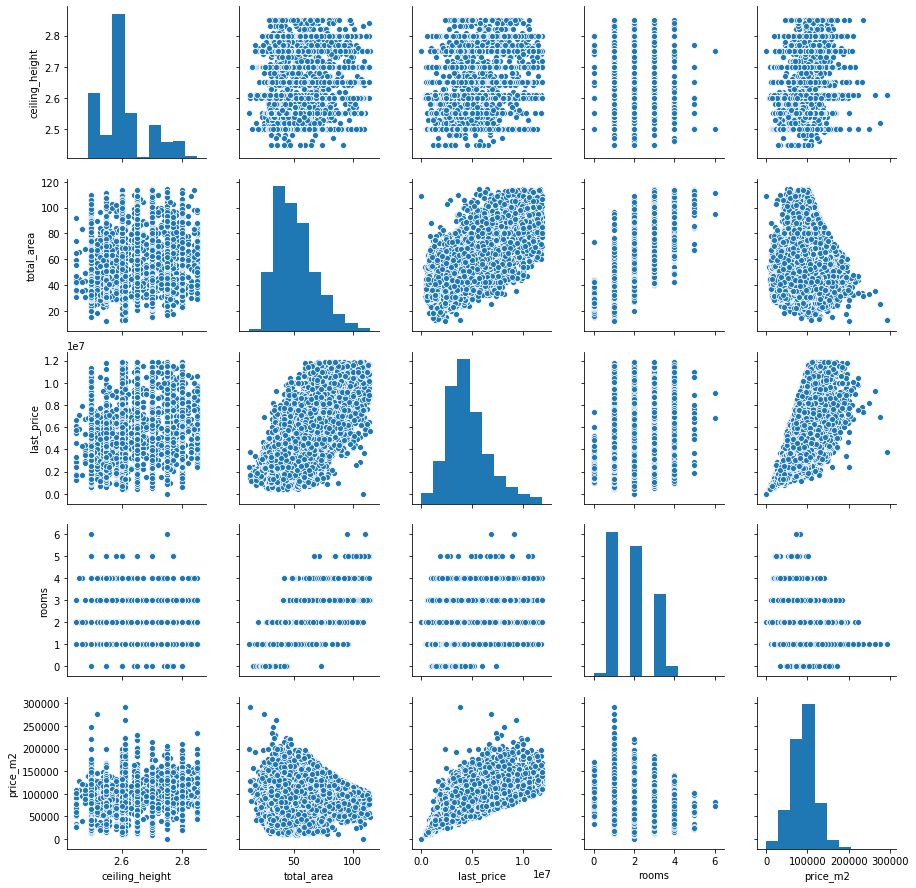

In [21]:
sns.pairplot(work_base_norm[['ceiling_height', 'total_area', 'last_price', 'rooms','price_m2']]);

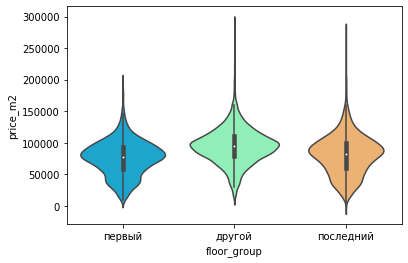

In [22]:
sns.violinplot(x="floor_group", y="price_m2", data=work_base_norm, palette='rainbow');

Согласно рассчитанным коэффициентам корреляции, наибольшее влияние на рыночная стоимость квартир имеет прямую зависимость от общей площади, жилой площади, площади кухни и количества комнат, а также обратную зависимость от удаленности от центра города. Говорить о зависимости от даты размещения объявления: дня недели, месяца и года, не приходится.
Рыночная стоимость зависит от того, на каком этаже расположен объект. При этом, у объектов, расположенных не на первом и последнем этаже, цена кв. м выше.

In [23]:
# Определим 10 населённых пунктов с наибольшим числом объявлений
ad_base = real_estate_base.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'min', 'max', 'mean', 'median'])
ad_base_top10 = ad_base.sort_values(('count','last_price'), ascending=False).head(10)
# Рассчитаем некоторые характеристики
ad_base_top10.columns = ['count_ad', 'min_price', 'max_price', 'mean_price', 'median_price']
price_m2 = work_base.pivot_table(index='locality_name', values='price_m2', aggfunc='mean')
ad_base_top10 = ad_base_top10.merge(price_m2, on='locality_name')
ad_base_top10[ad_base_top10['price_m2'] == ad_base_top10['price_m2'].min()] # Населенный пункт c самой низкой стоимостью жилья 

                      

,count_ad,min_price,max_price,mean_price,median_price,price_m2
locality_name,,,,,,
Выборг,237,600000.0,19990000.0,3.250983e+06,2897000.0,58141.909153


In [24]:
ad_base_top10[ad_base_top10['price_m2'] == ad_base_top10['price_m2'].max()] # Населенный пункт с самой высокой стоимостью жилья


,count_ad,min_price,max_price,mean_price,median_price,price_m2
locality_name,,,,,,
Санкт-Петербург,15721,12190.0,763000000.0,8.062507e+06,5500000.0,114849.008794


In [25]:
# Добавим столбец с растоянием до центра в километрах
SPB_base = work_base_norm.loc[work_base_norm['locality_name'] == 'Санкт-Петербург'].copy()
SPB_base['cityCenters_km'] = SPB_base['cityCenters_nearest']/1000
SPB_base['cityCenters_km'] = SPB_base['cityCenters_km'].apply('round')

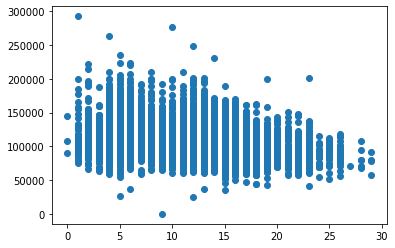

In [26]:
plt.scatter(x=SPB_base['cityCenters_km'], y=SPB_base['price_m2'])


Согласно полученному графику центральным районом Санкт-Петербурга может считаться зона в радиусе 7 км от центра города.

In [27]:
#Выделяем сегмент квартир в центре Санкт-Петербурга. 
SPB_base_centr = SPB_base.query('cityCenters_km <= 7').reset_index(drop=True)
#Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
parametr_list = ['ceiling_height', 'total_area', 'last_price', 'rooms']
for parametr in parametr_list:
    print()
    print('Характеристики в отношении ' + parametr)
    print(SPB_base_centr[parametr].describe())



Характеристики в отношении ceiling_height
count    1308.000000
mean        2.646483
std         0.080414
min         2.450000
25%         2.600000
50%         2.610000
75%         2.700000
max         2.850000
Name: ceiling_height, dtype: float64

Характеристики в отношении total_area
count    1308.000000
mean       60.937255
std        20.275521
min        12.000000
25%        44.500000
50%        59.100000
75%        74.050000
max       114.200000
Name: total_area, dtype: float64

Характеристики в отношении last_price
count    1.308000e+03
mean     7.110086e+06
std      2.177737e+06
min      1.686000e+06
25%      5.427500e+06
50%      6.877528e+06
75%      8.643283e+06
max      1.190000e+07
Name: last_price, dtype: float64

Характеристики в отношении rooms
count    1308.000000
mean        2.102446
std         0.909136
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


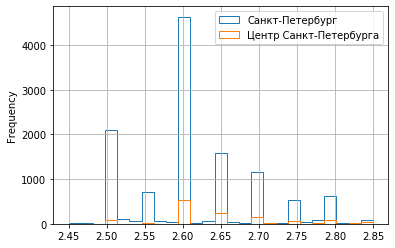

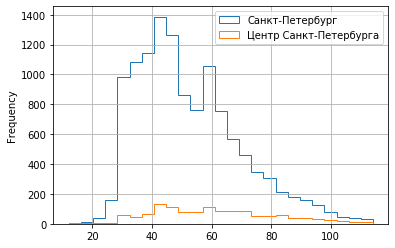

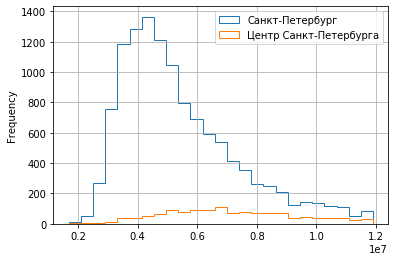

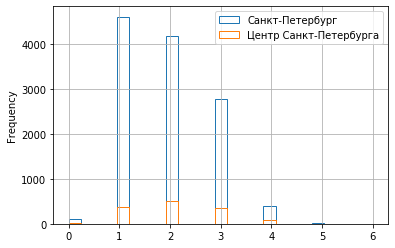

In [33]:
# По всем параметрам построим гистограммы для ряда параметров.
parametr_list = ['ceiling_height', 'total_area', 'last_price', 'rooms']
for parametr in parametr_list:
    min_range_value = 0
    max_range_value = 0
    data_characteristics_dict = SPB_base_centr[parametr].describe().to_dict()
    IQR_for_hist = data_characteristics_dict['75%'] - data_characteristics_dict['25%']
    min_range_value = data_characteristics_dict['25%'] - 3 * IQR_for_hist
    max_range_value = data_characteristics_dict['75%'] + 3 * IQR_for_hist
    if min_range_value < data_characteristics_dict['min']:
        min_range_value = data_characteristics_dict['min']
    if max_range_value > data_characteristics_dict['max']:
        max_range_value = data_characteristics_dict['max']
    ax = SPB_base.plot(kind='hist', y=parametr, histtype='step', range=(
               min_range_value, max_range_value), bins=25, label='Санкт-Петербург')
    SPB_base_centr.plot(kind='hist', y=parametr, histtype='step', range=(
                min_range_value, max_range_value), bins=25, label='Центр Санкт-Петербурга',
                ax=ax, grid=True)

Между характеристиками, полученными по всей базе объявлений, и характеристиками по центру Санкт-Петербурга имеются следующие различия:
медиана количества комнат по общей базе - 2, по центру Санкт-Петербурга - 3;
медиана цены: 4,65 млн руб. и 9,2 млн руб.;
медиана общей площади: 52 кв. м и 78,7 кв. м;
медиана высоты потолков 2,61 м и 2,88 м.
Таким образом, квартиры в центре Санкт-Петербурга продаются большей площади, количества комнат и высоты потолков. Цена квартир в центре практически в 2 раза выше.

In [28]:
SPB_base_centr.corr()

,total_area,last_price,floor,floors_total,kitchen_area,living_area,rooms,ceiling_height,days_exposition,cityCenters_nearest,price_m2,weekday_ad,month_ad,year_ad,living_share,kitchen_share,cityCenters_km
total_area,1.000000,0.709277,-0.033146,-0.071127,0.375236,0.909975,0.789839,0.223830,0.125923,-0.173670,-0.447781,0.006938,0.040421,-0.125246,0.278644,-0.430358,-0.178797
last_price,0.709277,1.000000,0.171359,0.182808,0.468077,0.565173,0.441034,0.194382,0.141264,-0.098520,0.267371,0.018166,0.003576,-0.012998,0.011816,-0.125338,-0.107186
floor,-0.033146,0.171359,1.000000,0.612454,0.108062,-0.103179,-0.131328,0.012942,0.012335,0.283465,0.255174,0.050399,0.012596,0.034405,-0.189221,0.130245,0.270360
floors_total,-0.071127,0.182808,0.612454,1.000000,0.181453,-0.203410,-0.252767,0.024284,0.033215,0.395810,0.324800,0.030141,0.004342,0.018516,-0.348705,0.248184,0.386498
kitchen_area,0.375236,0.468077,0.108062,0.181453,1.000000,0.092140,0.033454,0.093420,0.151306,-0.058898,0.071703,0.039352,-0.001120,-0.078767,-0.471203,0.629497,-0.061209
living_area,0.909975,0.565173,-0.103179,-0.203410,0.092140,1.000000,0.854117,0.203803,0.067899,-0.179602,-0.503914,-0.000741,0.043779,-0.089237,0.629436,-0.625638,-0.184249
rooms,0.789839,0.441034,-0.131328,-0.252767,0.033454,0.854117,1.000000,0.182847,0.041860,-0.187634,-0.513984,0.002323,0.034729,-0.068155,0.537712,-0.595516,-0.188672
ceiling_height,0.223830,0.194382,0.012942,0.024284,0.093420,0.203803,0.182847,1.000000,0.061075,-0.110026,-0.020852,-0.016888,0.004740,-0.044696,0.027496,-0.052501,-0.114991
days_exposition,0.125923,0.141264,0.012335,0.033215,0.151306,0.067899,0.041860,0.061075,1.000000,-0.043776,0.002315,-0.055760,-0.050521,-0.645963,-0.092598,0.056317,-0.057270
cityCenters_nearest,-0.173670,-0.098520,0.283465,0.395810,-0.058898,-0.179602,-0.187634,-0.110026,-0.043776,1.000000,0.080859,-0.006322,0.010280,0.073723,-0.102480,0.071931,0.985658


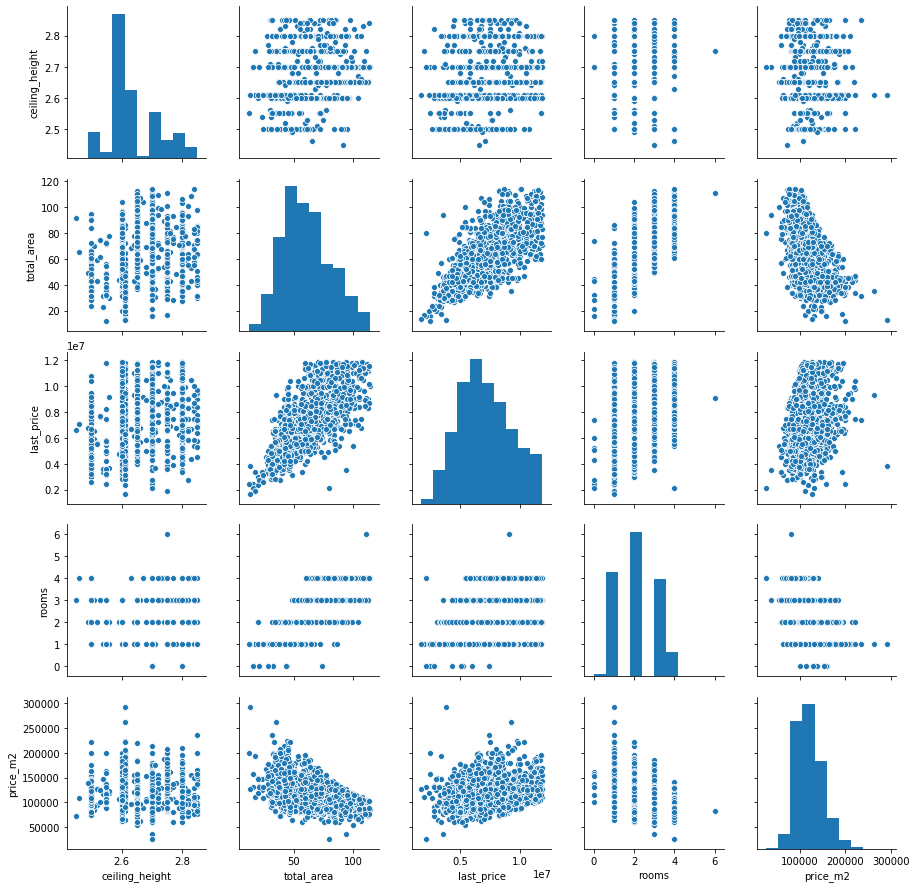

In [29]:
sns.pairplot(SPB_base_centr[['ceiling_height', 'total_area', 'last_price', 'rooms','price_m2']]);

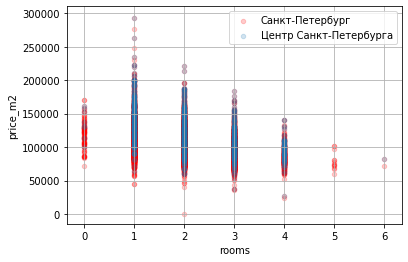

In [49]:
ax = SPB_base.plot(kind='scatter', y='price_m2', x='rooms', label='Санкт-Петербург', alpha =0.2, color='red')
SPB_base_centr.plot(kind='scatter', y='price_m2', x='rooms', label='Центр Санкт-Петербурга', alpha =0.2,
                ax=ax, grid=True)

### Шаг 5. Общий вывод


  Уважаемые сотрудники сервиса Яндекс.Недвижимость, спасибо за предоставленные данные. Проведен исследовательский анализ данных рынка недвижимости в целях установления параметров, влияющих на рыночную стоимость объектов недвижимости. 
  В связи с отсутствием более 10% значений в анализируемых столбцах, была произведена предобработка данных, заполнены отсутствующие значения в столбцах, изменены типы данных на соответствующие значениям. Пропушены значения в столбцах: floors_total, kitchen_area, living_area, ceiling_height, locality_name, связаны с неточностями при вводе объявлений. Значения в cityCenters_nearest отсутствуют, в основном, в населенных пунктах Ленинградской области. Отсутствующие значения в столбце days_exposition могут свидетельствовать о том, что недвижимость ещё не продана. В столбце "Название населенного пункта" ('locality_name') пропуски не заполнялись, так как их количество незначительно.
  Согласно представленным данным, среднее значение экспозиции составило 181 день, медианное - 95 дней. При этом, можно считать, что продажи прошли очень быстро, если срок экспозиции объявления составлял менее 30 дней, очень медленно - более 313 дней.
  Определены 10 населённых пунктов с наибольшим числом объявлений. На них приходится 18 958 объявлений или 80% от общего количества (23 699). Среди них, самая высокая цена за квадратный метр - в Санкт-Петербурге - 115 тыс. руб. за кв. м (рассчитана по 15721 объявлению), самая низкая - в Выборге - 58 тыс. руб. за кв. м (по 237 объявлению).  
  По результатам анализа динамики цены за квадратный метр выделена зона в радиусе 7 км от центра Санкт-Петербурга, которую можно охарактеризовать как центральную зону.
  В рамках анализа произведено сравнение характеристик объектов, расположенных в центре Санкт-Петербурга, с остальными объектами и установлены следующие различия: медиана количества комнат по общей базе - 2, по центру Санкт-Петербурга - 3; медиана цены: 4,65 млн руб. и 9,2 млн руб.; медиана общей площади: 52 кв. м и 78,7 кв. м; медиана высоты потолков 2,61 м и 2,88 м. Таким образом, квартиры в центре Санкт-Петербурга продаются большей площади, количества комнат и высоты потолков. Цена квартир в центре практически в 2 раза выше.
  Согласно рассчитанным коэффициентам корреляции, наибольшее влияние на рыночную стоимость квартир оказывают общая площадь, жилая площадь, площадь кухни и количество комнат, коэффициенты корреляции 78%, 76%, 60% и 51% соответственно, также обратная зависимость имеется от удаленности от центра города, коэффициент корреляции минус 33%. Следует отметить, что для центра Санкт-Петербурга зависимость от расстояния практически отсутствует. Говорить о зависимости от даты размещения объявления: дня недели, месяца и года, также не приходится. Следует отметить, что рыночная стоимость зависит от того, на каком этаже расположен объект. При этом, у объектов, расположенных не на первом и последнем этаже, цена кв. м выше на 24% цен у объектов на первом этаже и на 12% чем на последнем.
  Надеюсь, что полученные результаты будут полезны для построения автоматизированной системы, которая позволит отследить аномалии и мошенническую деятельность.